In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [51]:
dataset = pd.read_csv('E:/PyETL/vgg16_test/done/big_table/all_shoe_less.csv')
dataset = dataset.sort_values(['商品型號'], ascending=[True])
x1 = dataset.iloc[:,3].values
x1
# x2 = dataset.iloc[:,6].values
# x3 = dataset.iloc[:,9].values

array(['#393837', '#545354', '#2b2b2a', ..., '#857b7f', '#24242d',
       '#e2e1e3'], dtype=object)

In [52]:
# 處理 主要顏色欄位

rgb_color_list = []
for hex_color1 in x1:
    # 轉10進制
    rgb_color_list.append(list(int(hex_color1[i:i+2], 16) for i in (1, 3, 5)))
rgb_color_list
rgb_mcolor1 = []
rgb_mcolor2 = []
rgb_mcolor3 = []

## 抓RGB的R顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor1.append(rgb_color_list[i][0]/255)
rgb_mcolor1

## 抓RGB的G顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor2.append(rgb_color_list[i][1]/255)
rgb_mcolor2

## 抓RGB的B顏色
for i in range(len(rgb_color_list)):
    rgb_mcolor3.append(rgb_color_list[i][2]/255)
rgb_mcolor3

[0.21568627450980393,
 0.32941176470588235,
 0.16470588235294117,
 0.14901960784313725,
 0.12156862745098039,
 0.09803921568627451,
 0.07058823529411765,
 0.07450980392156863,
 0.7254901960784313,
 0.8745098039215686,
 0.08627450980392157,
 0.11372549019607843,
 0.3215686274509804,
 0.6392156862745098,
 0.6745098039215687,
 0.28627450980392155,
 0.27450980392156865,
 0.08235294117647059,
 0.18823529411764706,
 0.9176470588235294,
 0.5411764705882353,
 0.6823529411764706,
 0.33725490196078434,
 0.9176470588235294,
 0.11372549019607843,
 0.08627450980392157,
 0.15294117647058825,
 0.15294117647058825,
 0.6941176470588235,
 0.7372549019607844,
 0.6823529411764706,
 0.20784313725490197,
 0.09019607843137255,
 0.1411764705882353,
 0.796078431372549,
 0.796078431372549,
 0.6666666666666666,
 0.5372549019607843,
 0.09803921568627451,
 0.16862745098039217,
 0.09803921568627451,
 0.19607843137254902,
 0.16470588235294117,
 0.5529411764705883,
 0.16862745098039217,
 0.6196078431372549,
 0.462745

In [53]:
dataset.insert(2, "B", rgb_mcolor3)
dataset.insert(2, "G", rgb_mcolor2)
dataset.insert(2, "R", rgb_mcolor1)
dataset

,商品型號,商品網址,R,G,B,主要顏色名稱,主要顏色編號,主要顏色占比,次要顏色名稱,次要顏色編號,次要顏色占比,其他顏色名稱,其他顏色編號,其他顏色占比,商品照片,商品標題,品牌,男女款,價格,商品介紹
0,011040,https://www.adidas.com/us/world-cup-cleats/011...,0.223529,0.219608,0.215686,DarkSlateGray,#393837,0.599,WhiteSmoke,#ebebec,0.217,DarkGray,#9e9d9b,0.184,"https://assets.adidas.com/images/w_600,f_auto,...",adidas World Cup Cleats - Black | adidas US,adidas,A,160.0,Supportive comfort Cushioned ride Traction on ...
1,015110,https://www.adidas.com/us/copa-mundial-cleats/...,0.329412,0.325490,0.329412,DimGray,#545354,0.642,WhiteSmoke,#ebebec,0.245,DarkGray,#a0a09c,0.113,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Copa Mundial Cleats - Black | adidas US,adidas,A,150.0,Soft comfort Cushioned ride Traction on firm g...
2,019228,https://www.adidas.com/us/mundial-team-shoes/0...,0.168627,0.168627,0.164706,Black,#2b2b2a,0.631,WhiteSmoke,#e9e9eb,0.248,DimGray,#646263,0.122,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Team Shoes - Black | adidas US,adidas,M,95.0,Soft comfort Cushioned ride Traction on turf S...
3,019310,https://www.adidas.com/us/mundial-goal-shoes/0...,0.149020,0.149020,0.149020,Black,#262626,0.552,WhiteSmoke,#e8e8e9,0.280,DimGray,#6a6867,0.168,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Goal Shoes - Black | adidas US,adidas,M,95.0,The Mundial Goal has dominated soccer's greate...
4,034563,https://www.adidas.com/us/samba-classic/034563...,0.121569,0.117647,0.121569,Black,#1f1e1f,0.412,DimGray,#594844,0.299,WhiteSmoke,#e9eaeb,0.211,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Samba Classic - Black | adidas US,adidas,A,70.0,Getting up and down the field with speed is th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,WZANPWV,https://www.newbalance.com/pd/fresh-foam-zante...,0.823529,0.819608,0.831373,LightGray,#d2d1d4,0.704,DimGray,#5d5d64,0.260,DarkSlateBlue,#4f2548,0.025,https://nb.scene7.com/is/image/NB/wzanpwv_nb_0...,Fresh Foam Zante Pursuit,new balance,W,109.99,We packed our New Balance Fresh Foam Zante Pur...
9202,WZANSBB,https://www.newbalance.com/pd/fresh-foam-zante...,0.223529,0.223529,0.215686,DarkSlateGray,#393937,0.543,DarkGray,#9d9d9e,0.302,Gainsboro,#e0e0e3,0.155,https://nb.scene7.com/is/image/NB/wzansbb_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9203,WZANSCS,https://www.newbalance.com/pd/fresh-foam-zante...,0.521569,0.482353,0.498039,Gray,#857b7f,0.544,WhiteSmoke,#f4f1f2,0.456,Gray,#857b7f,0.544,https://nb.scene7.com/is/image/NB/wzanscs_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9204,WZANSLN,https://www.newbalance.com/pd/fresh-foam-zante...,0.141176,0.141176,0.176471,Black,#24242d,0.428,LightGray,#ccd0d5,0.281,DarkSlateGray,#2d5552,0.128,https://nb.scene7.com/is/image/NB/wzansln_nb_0...,Fresh Foam Zante Solas London Collection,new balance,W,99.99,Celebrate the Virgin Money London Marathon wit...


In [54]:
def rgb_to_hsv(r, g, b):
    r, g, b = r/255.0, g/255.0, b/255.0
    mx = max(r, g, b)
    mn = min(r, g, b)
    df = mx-mn
    if mx == mn:
        h = 0
    elif mx == r:
        h = (60 * ((g-b)/df) + 360) % 360
    elif mx == g:
        h = (60 * ((b-r)/df) + 120) % 360
    elif mx == b:
        h = (60 * ((r-g)/df) + 240) % 360
    if mx == 0:
        s = 0
    else:
        s = (df/mx)*100
    v = mx*100
    return h, s, v

print(rgb_to_hsv(255, 255, 255))
print(rgb_to_hsv(0, 215, 0))

(0, 0.0, 100.0)
(120.0, 100.0, 84.31372549019608)


In [55]:
import math
hsv_mcolor1 = []
hsv_mcolor2 = []
hsv_mcolor3 = []

for i in range(len(rgb_color_list)):
    h, s, v = rgb_to_hsv(rgb_color_list[i][0], rgb_color_list[i][1], rgb_color_list[i][2])
    h = math.cos(h*math.pi/180)
    h = (h+1)/2
    s = s/100
    v = v / 100
    hsv_mcolor1.append(h)
    hsv_mcolor2.append(s)
    hsv_mcolor3.append(v)
hsv_mcolor1

[0.9330127018922199,
 0.75,
 0.75,
 1.0,
 0.75,
 0.41317591116653485,
 0.24999999999999978,
 0.24999999999999978,
 0.9131193871579975,
 0.8665259359149127,
 0.75,
 0.992403876506104,
 0.8830222215594883,
 0.11697777844051027,
 0.03204703662133718,
 0.016447808804744612,
 1.0,
 1.0,
 1.0,
 0.41317591116653485,
 0.022930371799975535,
 0.03320978675139913,
 0.995557639657199,
 0.41317591116653485,
 0.75,
 1.0,
 1.0,
 0.24999999999999978,
 0.75,
 0.16543469682057127,
 0.005253814123502176,
 0.16543469682057077,
 1.0,
 1.0,
 0.75,
 0.75,
 0.023301803972534674,
 0.75,
 0.9330127018922192,
 1.0,
 0.9330127018922192,
 0.9698463103929544,
 0.9330127018922189,
 0.0027390523158632996,
 1.0,
 0.03892861153703342,
 0.06204083721655601,
 0.75,
 1.0,
 0.06698729810778126,
 0.9698463103929542,
 0.9330127018922194,
 0.24999999999999978,
 0.9890738003669028,
 0.2500000000000001,
 0.09549150281252627,
 0.9997451922302986,
 0.9698463103929542,
 0.9504844339512095,
 0.9829629131445341,
 0.06307531146510748

In [56]:
dataset.insert(2, "V", hsv_mcolor3)
dataset.insert(2, "S", hsv_mcolor2)
dataset.insert(2, "H", hsv_mcolor1)

# dataset.insert(2, "SV", hsv_scolor3)
# dataset.insert(2, "SS", hsv_scolor2)
# dataset.insert(2, "SH", hsv_scolor1)

# dataset.insert(2, "ELV", hsv_elcolor3)
# dataset.insert(2, "ELS", hsv_elcolor2)
# dataset.insert(2, "ELH", hsv_elcolor1)

dataset

,商品型號,商品網址,H,S,V,R,G,B,主要顏色名稱,主要顏色編號,...,次要顏色占比,其他顏色名稱,其他顏色編號,其他顏色占比,商品照片,商品標題,品牌,男女款,價格,商品介紹
0,011040,https://www.adidas.com/us/world-cup-cleats/011...,0.933013,0.035088,0.223529,0.223529,0.219608,0.215686,DarkSlateGray,#393837,...,0.217,DarkGray,#9e9d9b,0.184,"https://assets.adidas.com/images/w_600,f_auto,...",adidas World Cup Cleats - Black | adidas US,adidas,A,160.0,Supportive comfort Cushioned ride Traction on ...
1,015110,https://www.adidas.com/us/copa-mundial-cleats/...,0.750000,0.011905,0.329412,0.329412,0.325490,0.329412,DimGray,#545354,...,0.245,DarkGray,#a0a09c,0.113,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Copa Mundial Cleats - Black | adidas US,adidas,A,150.0,Soft comfort Cushioned ride Traction on firm g...
2,019228,https://www.adidas.com/us/mundial-team-shoes/0...,0.750000,0.023256,0.168627,0.168627,0.168627,0.164706,Black,#2b2b2a,...,0.248,DimGray,#646263,0.122,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Team Shoes - Black | adidas US,adidas,M,95.0,Soft comfort Cushioned ride Traction on turf S...
3,019310,https://www.adidas.com/us/mundial-goal-shoes/0...,1.000000,0.000000,0.149020,0.149020,0.149020,0.149020,Black,#262626,...,0.280,DimGray,#6a6867,0.168,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Mundial Goal Shoes - Black | adidas US,adidas,M,95.0,The Mundial Goal has dominated soccer's greate...
4,034563,https://www.adidas.com/us/samba-classic/034563...,0.750000,0.032258,0.121569,0.121569,0.117647,0.121569,Black,#1f1e1f,...,0.299,WhiteSmoke,#e9eaeb,0.211,"https://assets.adidas.com/images/w_600,f_auto,...",adidas Samba Classic - Black | adidas US,adidas,A,70.0,Getting up and down the field with speed is th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9201,WZANPWV,https://www.newbalance.com/pd/fresh-foam-zante...,0.413176,0.014151,0.831373,0.823529,0.819608,0.831373,LightGray,#d2d1d4,...,0.260,DarkSlateBlue,#4f2548,0.025,https://nb.scene7.com/is/image/NB/wzanpwv_nb_0...,Fresh Foam Zante Pursuit,new balance,W,109.99,We packed our New Balance Fresh Foam Zante Pur...
9202,WZANSBB,https://www.newbalance.com/pd/fresh-foam-zante...,0.750000,0.035088,0.223529,0.223529,0.223529,0.215686,DarkSlateGray,#393937,...,0.302,Gainsboro,#e0e0e3,0.155,https://nb.scene7.com/is/image/NB/wzansbb_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9203,WZANSCS,https://www.newbalance.com/pd/fresh-foam-zante...,0.956773,0.075188,0.521569,0.521569,0.482353,0.498039,Gray,#857b7f,...,0.456,Gray,#857b7f,0.544,https://nb.scene7.com/is/image/NB/wzanscs_nb_0...,Fresh Foam Zante Solas,new balance,W,99.99,Meet the newest member of the innovative New B...
9204,WZANSLN,https://www.newbalance.com/pd/fresh-foam-zante...,0.250000,0.200000,0.176471,0.141176,0.141176,0.176471,Black,#24242d,...,0.281,DarkSlateGray,#2d5552,0.128,https://nb.scene7.com/is/image/NB/wzansln_nb_0...,Fresh Foam Zante Solas London Collection,new balance,W,99.99,Celebrate the Virgin Money London Marathon wit...


In [57]:
# x = dataset.iloc[:, [2, 3, 4, 5, 6, 7]].values
x = dataset.iloc[:, [2, 3, 4, 5, 6, 7, 10]].values
x

array([[0.9330127 , 0.03508772, 0.22352941, ..., 0.21960784, 0.21568627,
        0.599     ],
       [0.75      , 0.01190476, 0.32941176, ..., 0.3254902 , 0.32941176,
        0.642     ],
       [0.75      , 0.02325581, 0.16862745, ..., 0.16862745, 0.16470588,
        0.631     ],
       ...,
       [0.95677273, 0.07518797, 0.52156863, ..., 0.48235294, 0.49803922,
        0.544     ],
       [0.25      , 0.2       , 0.17647059, ..., 0.14117647, 0.17647059,
        0.428     ],
       [0.5       , 0.00881057, 0.89019608, ..., 0.88235294, 0.89019608,
        0.335     ]])

In [58]:
from sklearn.cluster import KMeans
# cluster = KMeans(n_clusters=15)

from sklearn.metrics import silhouette_score
x1 = []
y1 = []
for k in range(2, 40):
    cluster = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster.fit(x)
    s = silhouette_score(x, cluster.labels_)
    x1.append(k)
    y1.append(s)
print("K choice:", x1)
print("Score:", y1)

K choice: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
Score: [0.5085106350031705, 0.45040583987512134, 0.4324524268663154, 0.4467221793177033, 0.4336124424153798, 0.40829080927189954, 0.3988280936693997, 0.3731787032609211, 0.34223962153409443, 0.36177328994537883, 0.33233028723297364, 0.27783451660094904, 0.2892972706011296, 0.28712891853814376, 0.28640030868371746, 0.2871775092333289, 0.28403333468452063, 0.2840110708231958, 0.2810797248264047, 0.2756285060875237, 0.27521155040586215, 0.27523897986686313, 0.27443370756706986, 0.2698950040575826, 0.2713914920432587, 0.2717171482905245, 0.2711737420994754, 0.26754269562329197, 0.2650328575210164, 0.25748091088222935, 0.25171722922246564, 0.2621683229838838, 0.2529625068306755, 0.25644012397107246, 0.2534830933052871, 0.24537039022948984, 0.24649421404884084, 0.252541462506851]


<IPython.core.display.Javascript object>


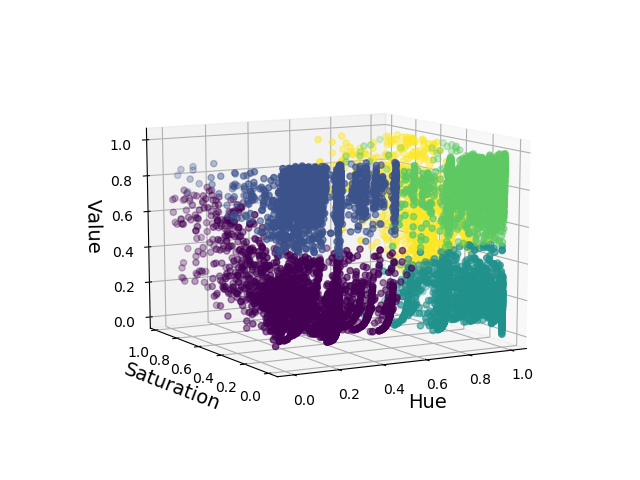

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [59]:
from sklearn import datasets
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
## 讓3d圖可旋轉
%matplotlib notebook


kmeans = KMeans(n_clusters=5)
kmeans = kmeans.fit(x)
labels = kmeans.predict(x)

fig=plt.figure('RGB K-MEANS Labels in HSV')
ax = fig.add_subplot(111, projection='3d')
ColorsA=plt.cm.viridis(np.linspace(0, 1,len(set(labels))),alpha=0.8) #Equally spaced color 

ax.set_title("")
ax.set_xlabel('Hue', fontsize=14)
ax.set_ylabel('Saturation', fontsize=14)
ax.set_zlabel('Value', fontsize=14)

for i in range(len(set(labels))): #Labels of the clusters 
    xL=[]
    yL=[]
    zL=[]
    for k in range(len(x)):
        if labels[k]==i: #Data points of each cluster 
            xL.append(hsv_mcolor1[k])
            yL.append(hsv_mcolor2[k])
            zL.append(hsv_mcolor3[k])

    ax.scatter(xL,yL,zL,c=ColorsA[i])

In [60]:
import os
path = "E:/PyETL/vgg16_test/done/big_table/all_pics/" #資料夾目錄
files= os.listdir(path) #得到資料夾下的所有檔名稱
files

['011040.jpg',
 '015110.jpg',
 '019228.jpg',
 '019310.jpg',
 '034563.jpg',
 '100007_BKW.jpg',
 '100013_BKLD.jpg',
 '100026_BBK.jpg',
 '100026_NAT.jpg',
 '100084_GUN.jpg',
 '1011A002-001.jpg',
 '1011A002-002.jpg',
 '1011A002-020.jpg',
 '1011A002-021.jpg',
 '1011A002-400.jpg',
 '1011A002-401.jpg',
 '1011A008-001.jpg',
 '1011A008-002.jpg',
 '1011A008-003.jpg',
 '1011A008-020.jpg',
 '1011A008-021.jpg',
 '1011A008-400.jpg',
 '1011A008-600.jpg',
 '1011A014-020.jpg',
 '1011A019-001.jpg',
 '1011A019-002.jpg',
 '1011A019-004.jpg',
 '1011A019-020.jpg',
 '1011A019-021.jpg',
 '1011A019-022.jpg',
 '1011A019-300.jpg',
 '1011A019-400.jpg',
 '1011A021-001.jpg',
 '1011A022-001.jpg',
 '1011A023-021.jpg',
 '1011A029-021.jpg',
 '1011A030-001.jpg',
 '1011A038-021.jpg',
 '1011A041-001.jpg',
 '1011A041-021.jpg',
 '1011A042-001.jpg',
 '1011A042-003.jpg',
 '1011A042-004.jpg',
 '1011A042-020.jpg',
 '1011A042-021.jpg',
 '1011A042-400.jpg',
 '1011A042-403.jpg',
 '1011A045-002.jpg',
 '1011A131-002.jpg',
 '1011A131

In [61]:
# import os, shutil
# dp = 'E:/PyETL/color_cluster/K-MEANS/HSV_RGB/maj/'
# for i in range(len(labels)):
#     if not os.path.exists(dp + str(labels[i])):
#         os.makedirs(dp + str(labels[i]))
#     path = dp + str(labels[i])
#     shutil.copyfile("E:/PyETL/vgg16_test/done/big_table/all_pics/" + files[i], path + '/' + files[i])
    
import os, shutil
dp = 'E:/PyETL/color_cluster/K-MEANS/HSV_RGB/maj_pa/'
for i in range(len(labels)):
    if not os.path.exists(dp + str(labels[i])):
        os.makedirs(dp + str(labels[i]))
    path = dp + str(labels[i])
    shutil.copyfile("E:/PyETL/vgg16_test/done/big_table/all_pics/" + files[i], path + '/' + files[i])

# 熱度圖

In [79]:
# d = dataset[["H", 'S', "V", "R", "G", "B"]]
# d = dataset[["H", 'S', "R", "G", "B"]]
d = dataset[["H", 'S', "V", '主要顏色占比']]
d

,H,S,V,主要顏色占比
0,0.933013,0.035088,0.223529,0.599
1,0.750000,0.011905,0.329412,0.642
2,0.750000,0.023256,0.168627,0.631
3,1.000000,0.000000,0.149020,0.552
4,0.750000,0.032258,0.121569,0.412
...,...,...,...,...
9201,0.413176,0.014151,0.831373,0.704
9202,0.750000,0.035088,0.223529,0.543
9203,0.956773,0.075188,0.521569,0.544
9204,0.250000,0.200000,0.176471,0.428


e:\pyetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20027 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\pyetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 35201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\pyetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38991 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\pyetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 33394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\pyetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\pyetl\venv\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\pyetl\venv\li

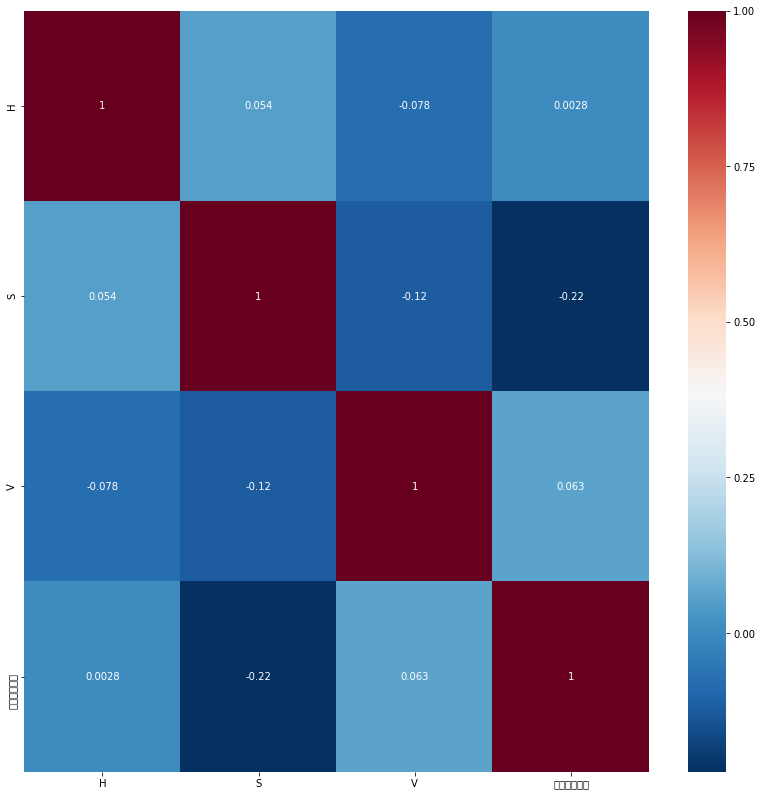

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 14))
sns.heatmap(d.corr(),
           annot=True,
           cmap="RdBu_r")